<a href="https://colab.research.google.com/github/Tatiana302/Lesson_3/blob/main/Python_Base_Pandas_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЗАДАЧА:
В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе. Такие данные можно использовать для построения персонализированных ИИ-ассистентов для поддержки обучения студента. Пока сосредоточимся на начальном этапе — сборе и подготовке данных.
 
ВАМ НЕОБХОДИМО:
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

ОПИСАНИЕ ДАННЫХ:
Для выполнения задания вам необходимы файлы train.csv, lectures.csv, questions.csv.

TRAIN.CSV

1.row_id: (int64) ID code for the row (идентификационный код для строки)

2.timestamp: (int64) the time in milliseconds between this user interaction and the first event completion from that user (время в миллисекундах между этим пользовательским взаимодействием и завершением первого события от этого пользователя)

3.user_id: (int32) ID code for the user (идентификационный код пользователя)

4.content_id: (int16) ID code for the user interaction (идентификационный код для взаимодействия с пользователем)

5.content_type_id: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture (0, если событием был вопрос, заданный пользователю, 1, если событием был пользователь, просматривающий лекцию)

6.task_container_id: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id (идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти три будут иметь общий идентификатор task_container_id)

7.user_answer: (int8) the user's answer to the question, if any. Read -1 as null, for lectures (ответ пользователя на вопрос, если таковой имеется. Считайте -1 как null, для лекций)

8.answered_correctly: (int8) if the user responded correctly. Read -1 as null, for lectures (если пользователь ответил правильно. Считайте -1 как null, для лекций)

9.prior_question_elapsed_time: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle (среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем наборе вопросов, игнорируя любые промежуточные лекции. Равно нулю для первого пакета вопросов пользователя или лекции. Обратите внимание, что время - это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем пакете)

10.prior_question_had_explanation: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback (независимо от того, видел ли пользователь объяснение и правильный ответ (ы) после ответа на предыдущий пакет вопросов, игнорируя любые промежуточные лекции. Значение является общим для всего пакета вопросов и равно нулю для первого пакета вопросов пользователя или лекции. Как правило, первые несколько вопросов, которые видит пользователь, были частью встроенного диагностического теста, где они не получили никакой обратной связи)

QUESTIONS.CSV: METADATA FOR THE QUESTIONS POSED TO USERS (МЕТАДАННЫЕ ДЛЯ ВОПРОСОВ, ЗАДАВАЕМЫХ ПОЛЬЗОВАТЕЛЯМ)

1.question_id: foreign key for the train/test content_id column, when the content type is question (0) (внешний ключ для столбца train/test content_id, когда тип содержимого - question (0))

2.bundle_id: code for which questions are served together (код, для которого вопросы подаются вместе)

3.correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right (ответ на этот вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав)

4.part: the relevant section of the TOEIC test (соответствующий раздел теста TOEIC)

5.tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together (один или несколько подробных кодов тегов для вопроса. Значение тегов не будет предоставлено, но этих кодов достаточно для объединения вопросов воедино)

LECTURES.CSV: METADATA FOR THE LECTURES WATCHED BY USERS AS THEY PROGRESS IN THEIR EDUCATION (МЕТАДАННЫЕ ДЛЯ ЛЕКЦИЙ, КОТОРЫЕ ПРОСМАТРИВАЮТ ПОЛЬЗОВАТЕЛИ ПО МЕРЕ ПРОДВИЖЕНИЯ В СВОЕМ ОБРАЗОВАНИИ)

1.lecture_id: foreign key for the train/test content_id column, when the content type is lecture (1) (внешний ключ для столбца train/test content_id, когда тип содержимого - lecture (1))

2.part: top level category code for the lecture (код категории верхнего уровня для лекции)

3.tag: one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together (один тег кодирует лекцию. Значение тегов не будет предоставлено, но этих кодов достаточно для объединения лекций воедино)

4.type_of: brief description of the core purpose of the lecture (краткое описание основной цели лекции)

# Import библиотек

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install PyDrive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# TRAIN.CSV

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/1aD9JVe-3C0lcAvwT6autRs_wqPs-HMq-/view?usp=share_link'

In [5]:
id = link.split("/")[-2]
download = drive.CreateFile({'id': id})
download.GetContentFile('train.csv.zip')

In [25]:
df = pd.read_csv("train.csv.zip", nrows = 2000000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 152.6+ MB


In [26]:
df.head(20)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
5,5,157063,115,156,0,5,2,1,5000.0,False
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
8,8,212463,115,7896,0,8,2,1,16000.0,False
9,9,230983,115,7863,0,9,0,1,16000.0,False


Поиск дубликатов и пропусков

In [27]:
df.duplicated().sum() # метод .duplicated() возвращает данные в бинарном виде: является ли отдельная строка дубликатом (True если является)
#Просуммировав мы узнаем сколько всего дубликатов 

0

In [28]:
df.isna().sum()

row_id                                0
timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                           0
answered_correctly                    0
prior_question_elapsed_time       46676
prior_question_had_explanation     7693
dtype: int64

In [29]:
df = df.drop('row_id', axis = 1) # удалим столбец row_id

Количество уникальных пользователей

In [30]:
df.agg({'user_id' : pd.Series.nunique})

user_id    7712
dtype: int64

Количество ответов у каждого пользователя

In [31]:
user_answer  = df[['user_id', 'user_answer', 'answered_correctly']]\
.groupby(['user_id'], as_index = False).sum()
user_answer.describe() # статистика по ответам

,user_id,user_answer,answered_correctly
count,7.712000e+03,7712.000000,7712.000000
mean,2.115097e+07,357.010633,161.368646
std,1.218766e+07,1029.422015,492.977551
min,1.150000e+02,0.000000,-2.000000
25%,1.069367e+07,37.000000,11.000000
50%,2.112127e+07,60.000000,22.000000
75%,3.172691e+07,224.000000,96.000000
max,4.220737e+07,21125.000000,11073.000000


Видел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущие вопросы. Значение является общим для всех вопросов и равно нулю для первого набора вопросов пользователя или лекции. Как правило, первые несколько вопросов, которые видит пользователь, были частью диагностического теста, где они не получили никакой обратной связи.

In [32]:
df[df.prior_question_had_explanation.isna()]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
46,0,124,7900,0,0,0,1,NaN,NaN
76,0,2746,5273,0,0,1,0,NaN,NaN
96,0,5382,5000,0,0,0,1,NaN,NaN
224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1999501,0,42189769,7900,0,0,0,1,NaN,NaN
1999517,0,42198669,3982,0,0,0,1,NaN,NaN
1999794,0,42200769,4554,0,0,1,1,NaN,NaN
1999829,0,42206662,4126,0,0,3,0,NaN,NaN


Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем наборе вопросов, игнорируя любые промежуточные лекции. Равно нулю для первого набора вопросов пользователя или лекции. Обратите внимание, что время - это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем наборе

In [18]:
df[df.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1999794,1999794,0,42200769,4554,0,0,1,1,NaN,NaN
1999812,1999812,575115,42200769,32312,1,19,-1,-1,NaN,False
1999817,1999817,663036,42200769,6808,1,23,-1,-1,NaN,False
1999829,1999829,0,42206662,4126,0,0,3,0,NaN,NaN


Посмотрим на то, какие у нас есть категориальные и численные столбцы

In [33]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно 


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столблцов =  1
Числовые данные:	  ['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столблцов =  8


Рассмотрим распределение значений по каждому числовому признаку (столбцу)

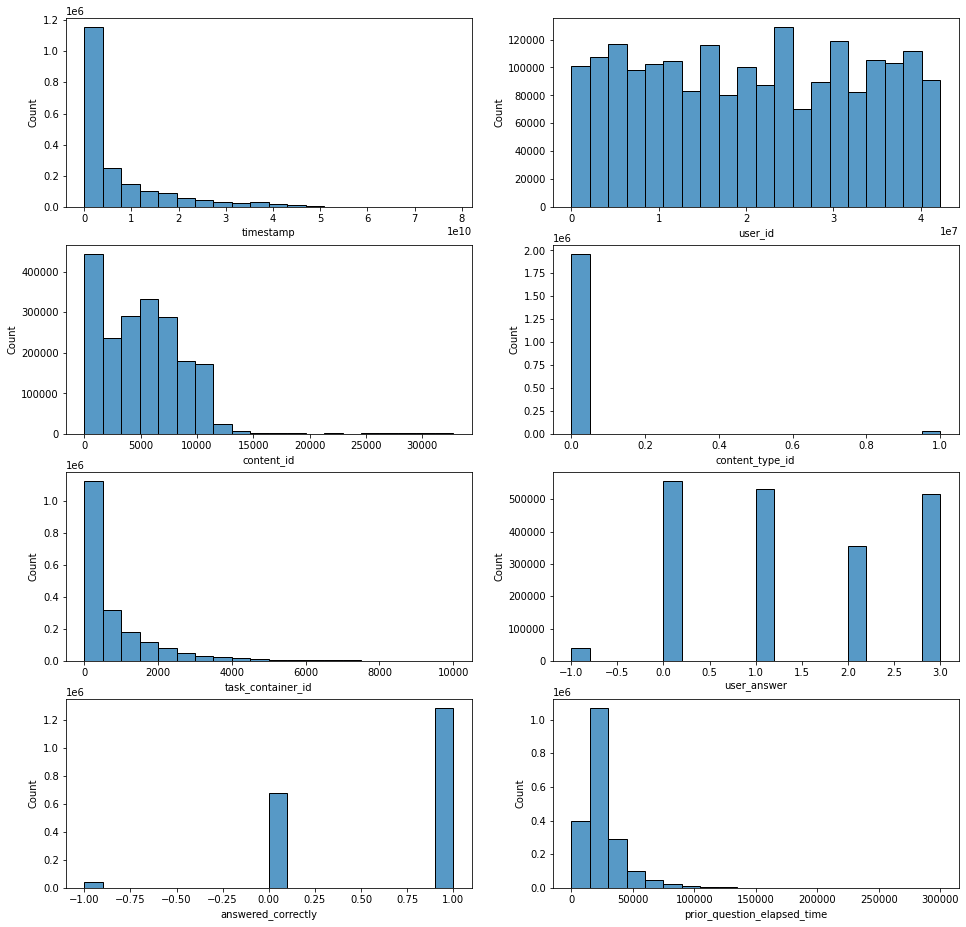

In [35]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,16)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные 
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовку
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=df, # какой датафрейм используем 
            x=column_name, # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем 

In [38]:
def remove_outliers(df,col,n_std):
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
        return df

user_answer = remove_outliers(user_answer, 'user_answer', 1)

user_answer['cor'] = user_answer['answered_correctly']/user_answer['user_answer']
user_answer.rename(columns={'user_answer':'user_answer_1'}, inplace=True)
user_answer.describe()

<ipython-input-38-e658a78a0fa4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_answer['cor'] = user_answer['answered_correctly']/user_answer['user_answer']
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,user_id,user_answer_1,answered_correctly,cor
count,7.264000e+03,7264.000000,7264.000000,7264.000000
mean,2.119619e+07,162.190666,69.613574,inf
std,1.218888e+07,241.838504,112.704533,NaN
min,1.150000e+02,0.000000,-2.000000,-0.017241
25%,1.074733e+07,36.000000,11.000000,0.294118
50%,2.118418e+07,55.000000,20.000000,0.392530
75%,3.177085e+07,158.000000,68.000000,0.470588
max,4.220737e+07,1385.000000,818.000000,inf


55.0


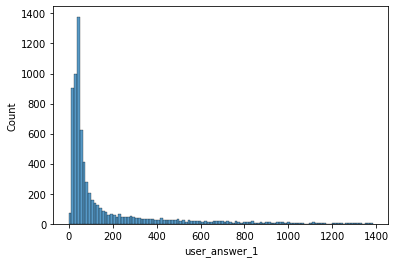

In [40]:
print(user_answer.user_answer_1.median())
sns.histplot(data = user_answer, x = 'user_answer_1')

0.44787644787644787


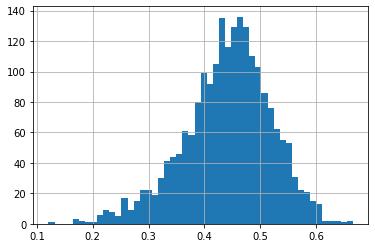

In [42]:
print(user_answer.query('user_answer_1 > 125')['cor'].median())
user_answer.query('user_answer_1 > 125')['cor'].hist(bins=50)

# LECTURES.CSV

Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving lectures.csv to lectures.csv


Считываем файл в DataFrame

In [ ]:
df_lec = pd.read_csv('/content/lectures.csv', delimiter = ',') # открываем загруженный файл, через полный путь к файлу (с именем)
df_lec

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [ ]:
df_lec.info # информация о данных в датафрейме: сколько строк, какие данные в столбцах, сколько пропущенных значений (Nan-values)

<bound method DataFrame.info of      lecture_id  tag  part           type_of
0            89  159     5           concept
1           100   70     1           concept
2           185   45     6           concept
3           192   79     5  solving question
4           317  156     5  solving question
..          ...  ...   ...               ...
413       32535    8     5  solving question
414       32570  113     3  solving question
415       32604   24     6           concept
416       32625  142     2           concept
417       32736   82     3           concept

[418 rows x 4 columns]>

Поиск дубликатов и пропусков

In [ ]:
df_lec.duplicated().sum() # метод .duplicated() возвращает данные в бинарном виде: является ли отдельная строка дубликатом (True если является)
#Просуммировав мы узнаем сколько всего дубликатов 

0

In [ ]:
df_lec.isna().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

Посмотрим распределение лекций

In [ ]:
df_lec[['type_of','part','lecture_id']].groupby(['type_of','part'], as_index = False).count().sort_values(by=['type_of', 'part'])

,type_of,part,lecture_id
0,concept,1,20
1,concept,2,18
2,concept,3,7
3,concept,4,19
4,concept,5,72
5,concept,6,63
6,concept,7,23
7,intention,2,7
8,solving question,1,34
9,solving question,2,31


In [ ]:
df_lec['type_of'].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

Основная часть лекций состоит из конспектов и ответов на вопросы

Зависимости параметров друг от друга

<Figure size 1080x1080 with 0 Axes>

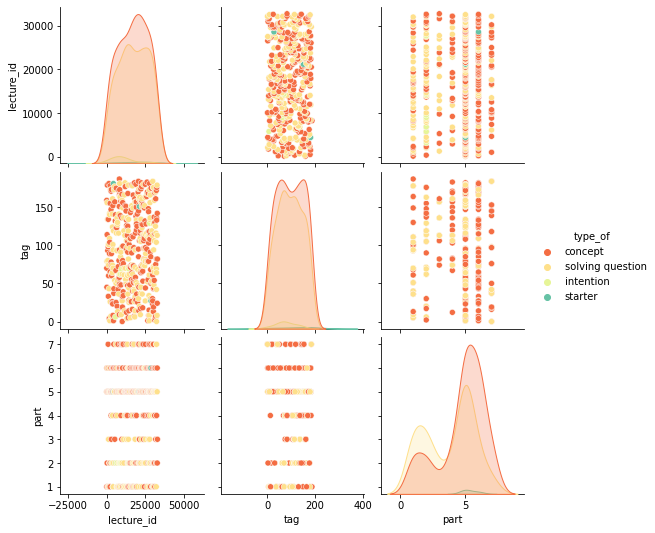

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df_lec,  # какой датафрей используем
             hue ='type_of', # какую переменную используем для подкрашиваиния данных
             palette = 'Spectral') # какую цветовую карту используем
                     

Определение связи между лекциями и разделами

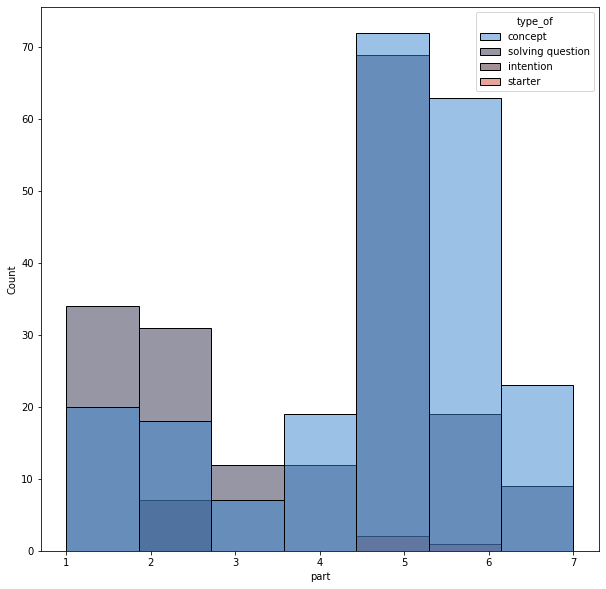

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(data = df_lec, # какой датафрейм используем
             x = 'part', # какую переменную отрисовываем
             hue = 'type_of', # какую переменную используем для подкрашиваиния данных. 
             bins = 7, # на сколько ячеек разбиваем
             palette='icefire') # какую цветовую карту используем

# QUESTIONS.CSV

Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving questions.csv to questions.csv


Считываем файл в DataFrame

In [ ]:
df_quec = pd.read_csv('/content/questions.csv', delimiter = ',') # открываем загруженный файл, через полный путь к файлу (с именем)
df_quec

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [ ]:
df_quec.info # информация о данных в датафрейме: сколько строк, какие данные в столбцах, сколько пропущенных значений (Nan-values)

<bound method DataFrame.info of        question_id  bundle_id  correct_answer  part            tags
0                0          0               0     1   51 131 162 38
1                1          1               1     1       131 36 81
2                2          2               0     1  131 101 162 92
3                3          3               0     1  131 149 162 29
4                4          4               3     1    131 5 162 38
...            ...        ...             ...   ...             ...
13518        13518      13518               3     5              14
13519        13519      13519               3     5               8
13520        13520      13520               2     5              73
13521        13521      13521               0     5             125
13522        13522      13522               3     5              55

[13523 rows x 5 columns]>

Поиск дубликатов и пропусков

In [ ]:
df_quec.duplicated().sum() # метод .duplicated() возвращает данные в бинарном виде: является ли отдельная строка дубликатом (True если является)
#Просуммировав мы узнаем сколько всего дубликатов 

0

In [ ]:
df_quec.isna().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [ ]:
df_quec[df_quec.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [ ]:
df_quec[['part','question_id']].groupby(['part'], as_index=False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


Посмотрим распределение частей

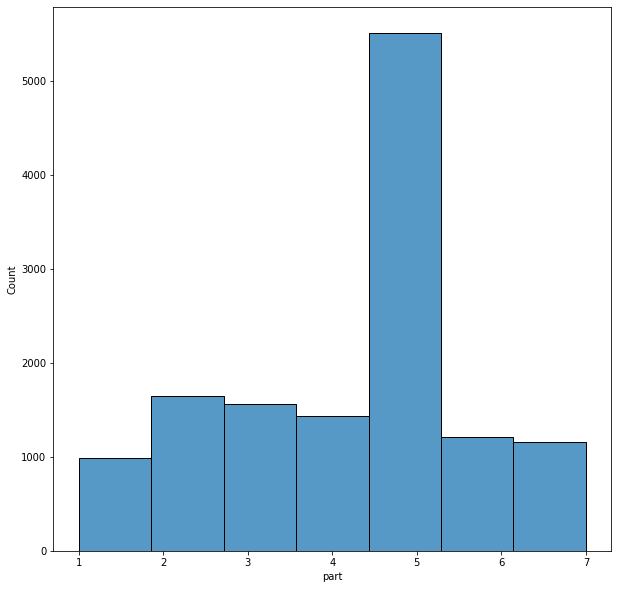

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(data = df_quec, # какой датафрейм используем
             x = 'part', # какую переменную отрисовываем
             bins = 7, # на сколько ячеек разбиваем
             palette='icefire') # какую цветовую карту используем

Части распределены равномерно, за исключением пятой.